Importar as Bibliotecas

In [1]:
import os
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

Importar as imagens do Google Drive

In [2]:
# caminho da pasta de entrada e saída
input_folder = "/content/drive/MyDrive/DisciplinaMachineLearning/MEV - metamaficas/AT-Z-01 Cortada/imagens"
output_folder = "/content/drive/MyDrive/DisciplinaMachineLearning/MEV - metamaficas/AT-Z-01 Cortada/imagens_sem_ruído"

# verifica se a pasta de saída existe, caso não exista, cria a pasta
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

**Aplicar Filtro** 

A função cv2.fastNlMeansDenoising() é utilizada para remover o ruído de uma imagem em tons de cinza. Ela possui os seguintes parâmetros:

*   src: a imagem de entrada a ser denoised. Deve ser uma matriz NumPy do tipo np.uint8 ou np.float32.
*   dst: a imagem de saída denoised. Se não for fornecido, é criada uma nova matriz com o mesmo tamanho e tipo que a imagem de entrada.
*   h: parâmetro que define a intensidade do filtro. Quanto maior o valor de h, mais forte é o filtro de remoção de ruído. Geralmente, um valor entre 5 e 15 é adequado.
*   hForColorComponents: parâmetro que define a intensidade do filtro para cada componente de cor em uma imagem colorida. Este parâmetro é ignorado quando se trabalha com imagens em tons de cinza.
*   templateWindowSize: tamanho da janela usada para calcular o filtro. Quanto maior o tamanho, mais lento é o filtro, mas também mais preciso é o resultado. Geralmente, um valor entre 7 e 21 é adequado.
*   searchWindowSize: tamanho da janela usada para buscar por pixels semelhantes. Quanto maior o tamanho, mais lento é o filtro, mas também mais preciso é o resultado. Geralmente, um valor entre 21 e 35 é adequado.

O algoritmo de remoção de ruído é baseado no algoritmo Non-local Means (NLMeans), que funciona comparando os pixels em uma janela de busca para encontrar os pixels mais semelhantes, e então utiliza esses pixels para calcular o valor do pixel atual. O algoritmo NLMeans é mais eficiente do que outros algoritmos de denoising, pois ele usa informações de toda a imagem, em vez de apenas uma janela local.


In [5]:
# lista de arquivos na pasta de entrada
files = os.listdir(input_folder)

# percorre cada arquivo na pasta de entrada
for file_name in files:
    # verifica se o arquivo é uma imagem TIFF
    if file_name.endswith('.tif') or file_name.endswith('.tiff'):
        try:
            # carrega a imagem em formato TIFF em tons de cinza
            with Image.open(os.path.join(input_folder, file_name)) as image:
                image = np.array(image.convert("L"))

            # aplica o filtro de remoção de ruído
            denoised_image = cv2.fastNlMeansDenoising(image, None, 10, 7, 21)

            # salva a imagem em formato TIFF na pasta de saída
            Image.fromarray(denoised_image).save(os.path.join(output_folder, file_name))
        except OSError:
            print(f"Erro ao processar o arquivo {file_name}")



Erro ao processar o arquivo AT-Z-01-21.tif


Exibir imagens pré e pós filtro

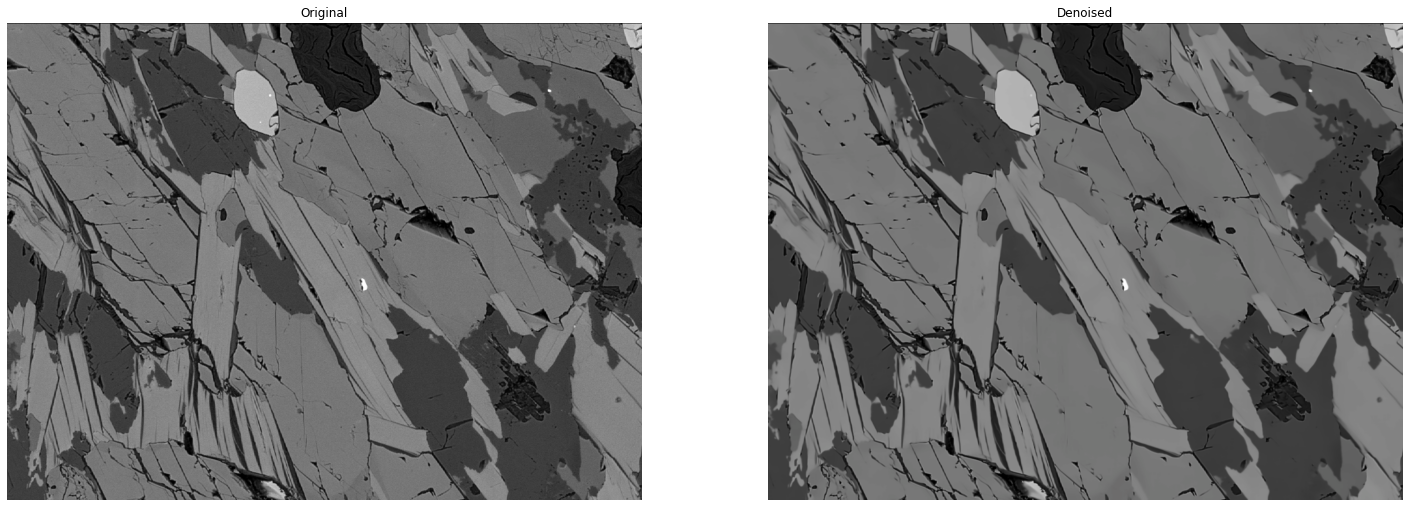

In [14]:
# seleciona aleatoriamente 1 par de imagens para exibir
random_idx = np.random.choice(len(files), size=1, replace=False)[0]

# carrega a imagem original
try:
    with Image.open(os.path.join(input_folder, files[random_idx])) as original_image:
        original_image = np.array(original_image)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
except OSError:
    print(f"Erro ao carregar a imagem original do arquivo {files[random_idx]}")

# carrega a imagem denoised
try:
    with Image.open(os.path.join(output_folder, files[random_idx])) as denoised_image:
        denoised_image = np.array(denoised_image)
    denoised_image = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB)
except OSError:
    print(f"Erro ao carregar a imagem denoised do arquivo {files[random_idx]}")

# exibe as imagens em pares
fig, axes = plt.subplots(ncols=2, figsize=(25, 15))
axes[0].imshow(original_image)
axes[0].set_title("Original")
axes[0].axis("off")
axes[1].imshow(denoised_image)
axes[1].set_title("Denoised")
axes[1].axis("off")
plt.show()